In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(columns='Unnamed: 32',inplace=True)

In [6]:
df.shape

(569, 32)

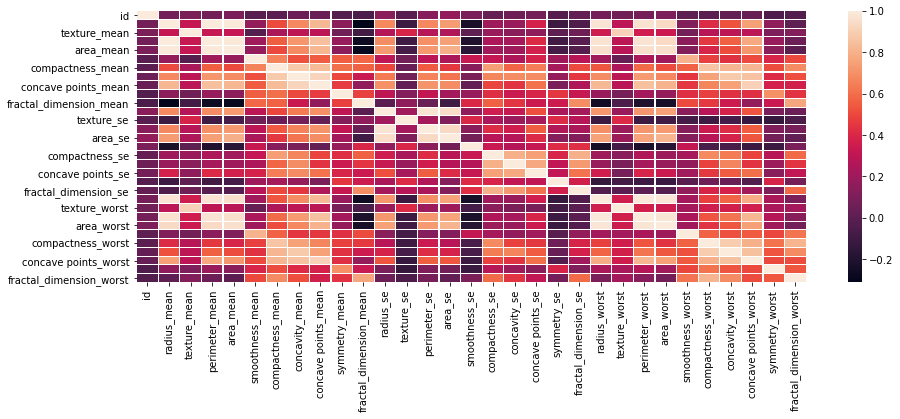

In [7]:
plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),linewidth=0.1,linecolor='white')
plt.show()

In [8]:
df.drop(columns='id',inplace=True)

In [9]:
a={'M':int(1),'B':int(0)}
df['diagnosis'].replace(a,inplace=True)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X=scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
#Using Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()

In [17]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred=clf.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_pred,y_test)

array([[70,  4],
       [ 2, 38]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.90      0.95      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [22]:
tn,fp,fn,tp = confusion_matrix(y_pred,y_test).ravel()

In [23]:
print('Acurracy:',(tp+tn)/(tp+fn+fp+tn))
P=tp/(tp+fp)
R=tp/(tp+fn)
F=(2*P*R)/(P+R)
print('Precision:',P)
print('Recall:',R)
print('F1 score',F)


Acurracy: 0.9473684210526315
Precision: 0.9047619047619048
Recall: 0.95
F1 score 0.9268292682926829


In [24]:
#Using KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy=[]
for i in range (1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [28]:
len(accuracy)

25

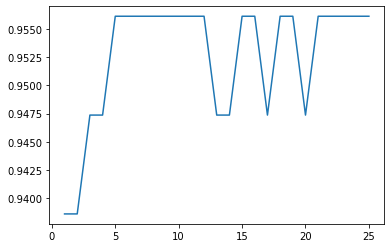

In [29]:
plt.plot(range(1,26),accuracy)

In [30]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [31]:
y_pred1=knn.predict(X_test)

In [32]:
accuracy_score(y_pred1,y_test)

0.956140350877193

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[72,  0],
       [ 5, 37]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        77
           1       0.88      1.00      0.94        37

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
tn1,fp1,fn1,tp1 = confusion_matrix(y_pred1,y_test).ravel()

In [36]:
print('Acurracy:',(tp1+tn1)/(tp1+fn1+fp1+tn1))
P1=tp1/(tp1+fp1)
R1=tp1/(tp1+fn1)
F1=(2*P1*R1)/(P1+R1)
print('Precision:',P1)
print('Recall:',R1)
print('F1 score',F1)


Acurracy: 0.956140350877193
Precision: 0.8809523809523809
Recall: 1.0
F1 score 0.9367088607594937


In [37]:
#The Knn model is preferable because the the number of malignant cancers detected as benign by the confusion_matrix 
#is 0. The recall is 100% for this model.